In [1]:
!pip install pandas scikit-learn matplotlib seaborn


In [3]:

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
def load_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                _, title, genre, plot = parts
                data.append({"title": title, "genre": genre, "plot": plot})
    return pd.DataFrame(data)

file_path = "C:/Users/uggev/Downloads/archive/Genre Classification Dataset/train_data.txt"
df = load_data(file_path)
df.head()

,title,genre,plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['clean_plot'] = df['plot'].apply(clean_text)


In [7]:
le = LabelEncoder()
y = le.fit_transform(df['genre'])


In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_plot'])

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LogisticRegression(max_iter=1000)


In [15]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=le.classes_, zero_division=0))


Accuracy: 0.5761320667711888
              precision    recall  f1-score   support

      action       0.56      0.26      0.35       263
       adult       0.75      0.21      0.33       112
   adventure       0.46      0.15      0.23       139
   animation       0.67      0.10      0.17       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.54      1443
       crime       0.33      0.02      0.04       107
 documentary       0.66      0.84      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.37      0.07      0.11       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.95      0.45      0.61        40
     history       0.00      0.00      0.00        45
      horror       0.63      0.56      0.59       431
       music       0.65      0.49      0.56       144
     musical       0.50      0.02      0.04        50
     mystery       0.00      0.00      0.00        5

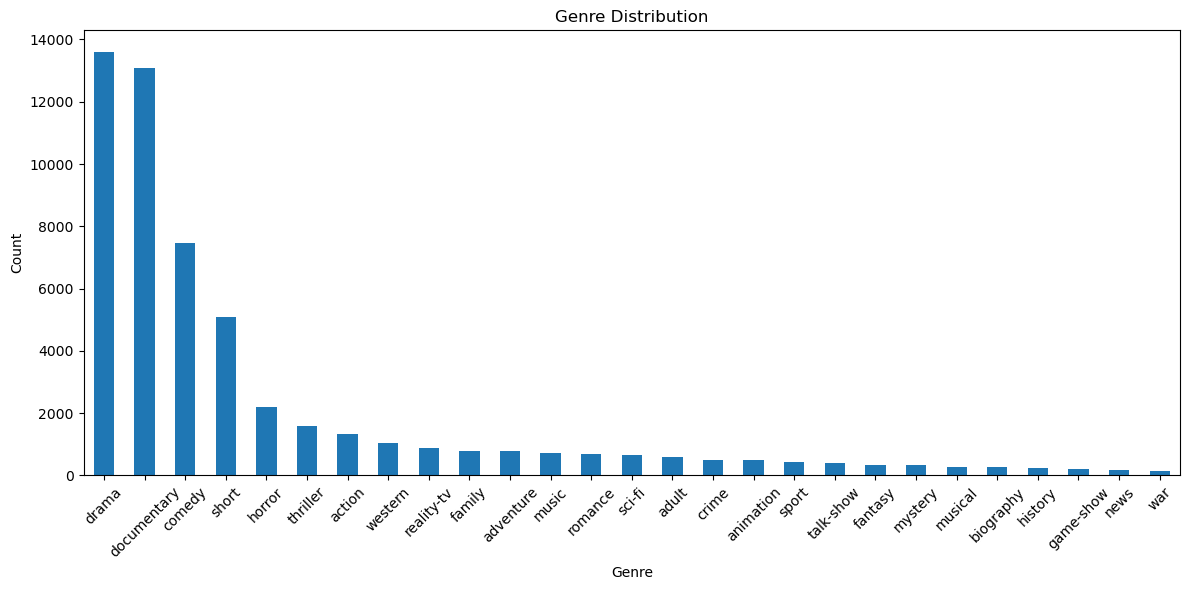

In [19]:
plt.figure(figsize=(12,6))
df['genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

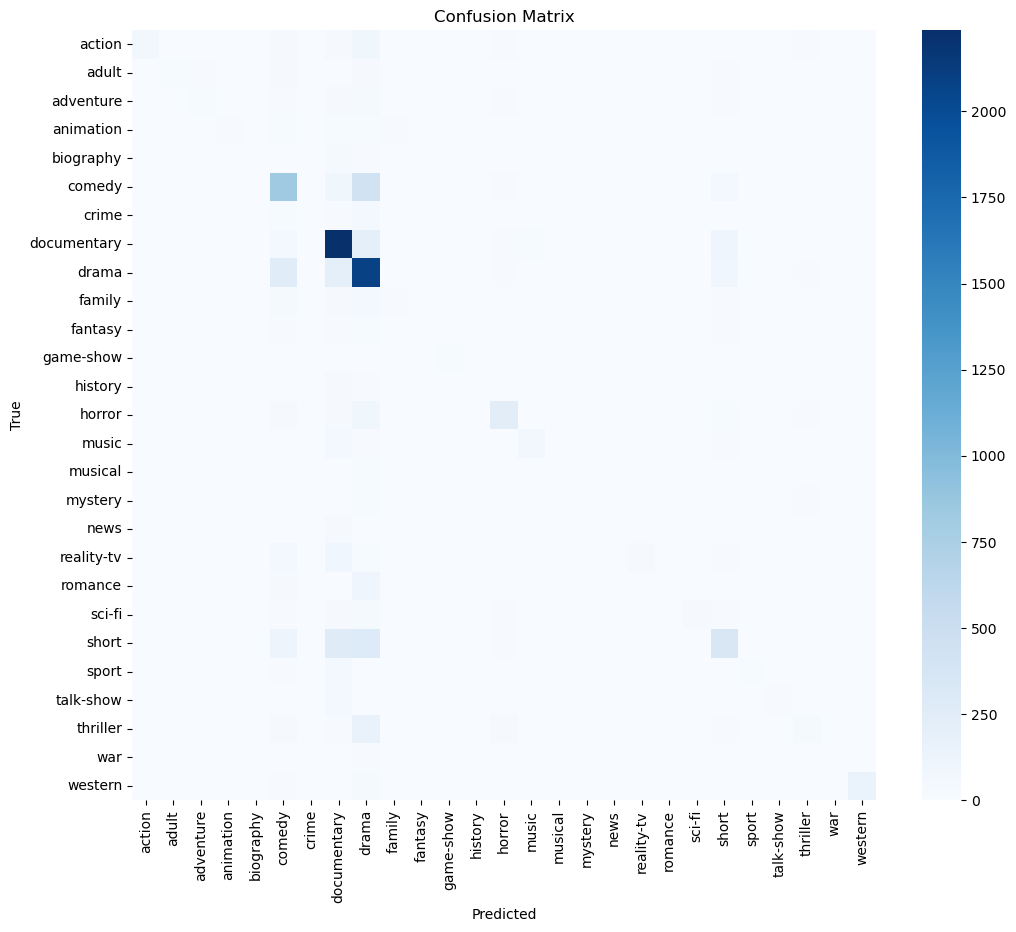

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
def predict_genre(plot_text, model):
    plot_clean = clean_text(plot_text)
    plot_vector = vectorizer.transform([plot_clean])
    prediction = model.predict(plot_vector)[0]
    return le.inverse_transform([prediction])[0]
# Example prediction
predict_genre("A brave knight fights a dragon to save the kingdom.", model)


'action'